# Importation des Bibliothèques

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

In [2]:
import shutil
from sklearn.model_selection import train_test_split

# Importation  et Préparation du dataset

In [3]:
dataset = 'J:\\Dataset_Billets'
train_dir = 'J:\\Dataset_Billets\\new\\Train'
test_dir = 'J:\\Dataset_Billets\\new\\Test'
 

# Création des classes et séparation des images 
Dans ce bloc de code nous effectuons les opérations suivante:
-Création des répertoires des classes(Bons_billets, faux_billets)pour l'entrainement et les tests
- lecture des images depuis chaque répertoire de classe et elles sont divisées en données d'entrainement 80% et de test 20%


In [4]:
classes = ['Bons billets', 'faux billets']
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

# Séparation des images de chaque classe
for cls in classes:
    class_dir = os.path.join(dataset, cls)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, cls, img))
    
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, cls, img))
        

#    Lister et afficher les images
ici nous listons les fichiers dans le repertoire puis on affiche le premier fichier du repertoire Bons_billets

In [5]:
image = dataset +'/new/'

In [6]:
os.listdir(image) 

['Test', 'Train']

In [7]:
test_path = image+'/test/'
train_path = image+'/train/'

In [8]:
os.listdir(test_path)

['Bons billets', 'faux billets']

In [9]:
os.listdir(train_path)

['Bons billets', 'faux billets']

In [10]:
os.listdir(train_path+'Bons billets')[0]

'.trashed-173816624-CamScanner 27-12-2024 14.13_14.jpg'

In [11]:
para_cell = train_path+'/Bons billets'+'/.trashed-173816624-CamScanner 27-12-2024 14.13_14.jpg'

In [12]:
para_img = imread(para_cell)

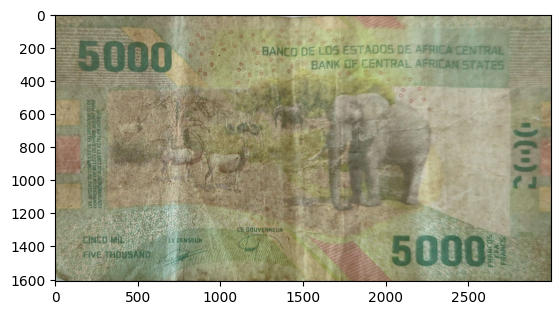

In [13]:
plt.imshow(para_img);

In [14]:
para_img.shape

(1611, 3000, 3)

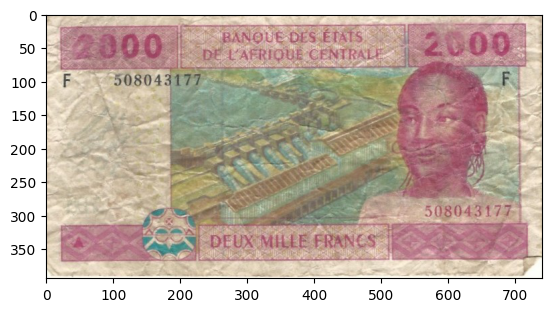

In [15]:
mauvais_path = train_path+'faux billets/'+os.listdir(train_path+'/faux billets')[0]
mauvais_cell = imread(mauvais_path)
plt.imshow(mauvais_cell);

In [16]:
len(os.listdir(train_path+'bons billets'))

111

In [17]:
len(os.listdir(train_path+'faux billets'))

9

In [18]:
image_shape = mauvais_cell.shape
image_shape

(394, 741, 3)

<h1>conclusion</h1>
<h3>objectif</h3>
<li>classifier le mieux possible les billets de banques </li>
<h3>analyse de forme</h3>
<li>variable target : notre dataset possede 2 classes qui sont mauvais et bon billets</li>
<li>type de variable : images </i>
<li>nombre dimages  : notre data set possede 151 images  </li>
<h3>analyse de fond :</h3>
<li>visualisation de la target : notre dataset possede 111 bon billets  et 9 mauvais billets dans notres donnees train + 28 bons billets et 3 mauvais billets pour le test donc elle est desequilibree</li>>

# Dimensions des images et visualisation 

Nous analysons et visualisations les images pour comprendre leur distribution avant de les introduire dans notre modèle. Ici on parcourt le répertoire d'image, on lit chaque image, extrait ses dimensions (hauteur et largeur) et on stocke ces dimensions dans deux listes séparées (dim1 et dim2).

In [130]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_dir+'Bons_billets'):
    
    img = imread(test_dir+'Bons_billets'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

# PREPARATION DES DONNÉES POUR LE MODÈLE 

ici nous redimensionnons et normalisons nos images

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
image_gen = ImageDataGenerator(
                               #width_shift_range=0.10, # Modifier la largeur de la photo de 10% maximum
                               #height_shift_range=0.10, # Modifier la hauteur de la photo de 10% maximum
                               rescale=1/255, # Redimensionner l'image en la normalisant
                              )

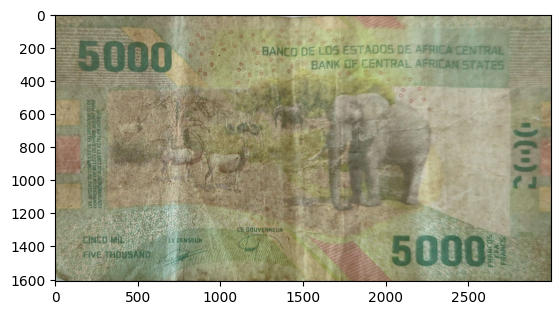

In [21]:
plt.imshow(para_img)

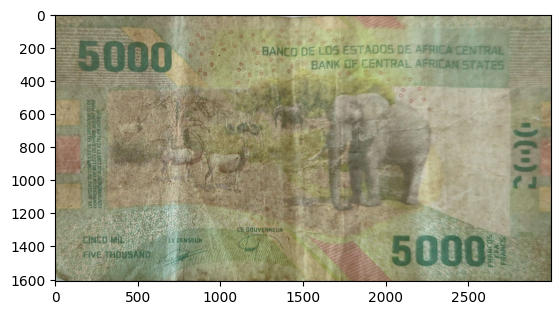

In [22]:
plt.imshow(image_gen.random_transform(para_img));

# Chargement des images d'entrainement et de test

Dans les données d'entrainement nous avons 120 images qui appartiennent à 2 classes et dans les données de test nous avons 31 images appartenant à 2 classes 

In [ ]:
train_generator.class_indices

In [23]:
image_gen.flow_from_directory(train_dir)

Found 120 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory(test_dir)

Found 31 images belonging to 2 classes.


# MODELE MLP (MULTILAYER PERCEPTRON)

Nous definissons notre modèle comme un modèle séquentiel dont les couches sont empilées les unes sur les autres.
la première couche est une couche flatten qui aplatit l'image d'entrée de taille 130x130 pixels avec 3 canaux(RGB) en un vecteur unidimensionnel.
Trois couches denses avec des fonctions d'activation relu pour les deux premières et la couche de sortie avec une fonction d'activation sigmoide pour la classification binaire(Bon/faux)

le modèle est compilé avec une fonction de perte binary_crossentropy, elle adaptée à la classification binaire.
l'optimiseur Adam est utilisé pour ajuster les poids du modèle 
la métrique accuracy est utilisée pour évaluer la performance du modèle 

In [138]:
from keras import models
from keras import layers

# Définition de la Taille des images
input_shape = (130, 130, 3)

# Modèle MLP
model = models.Sequential([
    layers.Flatten(input_shape=input_shape),  # Aplatir l'entrée d'image pour créer un vecteur 1D
    layers.Dense(512, activation='relu'),      # Couche cachée 1
    layers.Dense(256, activation='relu'),      # Couche cachée 2
    layers.Dense(128, activation='relu'),      # Couche cachée 3
    layers.Dense(1, activation='sigmoid')      # Couche de sortie
])

#Compiler le modèle avec une fonction de perte, un optimisateur Adam et des métriques
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\LENAFANNY\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
#Afficher un résumé du modèle pour obtenir des informations sur les couches

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 50700)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    25,958,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,123,265 (99.65 MB)

 Trainable params: 26,123,265 (99.65 MB)

 Non-trainable params: 0 (0.00 B)

## ENCODAGE

Le callback EarlyStopping est défini pour arreter l'entrainement prématurément si la perte de validation ne s'améliore pas après 2 epochs.
La taille du lot (batch size) est définie à 16,ce qui signifie que le modèle traitera 16 images à la fois pendant l'entrainement.

Deux générateurs de données sont crées pour l'entrainement et le test à l'aide de flow_from_directory. Cette methode est utilisée pour charger des images à partir de répertoires spécifiés (train_dir et test_dir).

Les images sont redimensionnées à la taille spécifiée dans le code.
 Le mode classe est défini binaire car nous effectuons une classification binaire (Bons et faux billets).

In [140]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [141]:
batch_size=16

In [142]:
train_generator = image_gen.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

test_generator = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',shuffle=False)

Found 120 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


Le dictionnaire class_indices montre la correspondance entre les noms des classes et leurs labels : 'Bons_billets' est associé à 0 et 'faux_billets' à 1.

# ENTRAINEMENT DU MODÈLE 

In [144]:
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7892 - loss: 2192.6660 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8125 - loss: 7790.5278

C:\Users\LENAFANNY\anaconda3\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.8125 - loss: 7790.5278 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9336 - loss: 923.0448 - val_accuracy: 0.0000e+00 - val_loss: 1610.1191
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - accuracy: 0.1250 - loss: 1426.1763 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9145 - loss: 2757.0103 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.9375 - loss: 3267.8877 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8177 - loss: 4917.3564 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8993 - loss: 1033.9124 -

In [183]:
loss, accuracy = model.evaluate(train_generator)

print("Perte sur les données d'entrainement' :", loss)
print("Précision sur les données d'entrainement :", accuracy)


print('')
val_loss, val_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("")
print("Perte sur les données de test :", val_loss)
print("Précision sur les données de test :", val_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 826ms/step - accuracy: 0.9479 - loss: 390.7141
Perte sur les données d'entrainement' : 577.2460327148438
Précision sur les données d'entrainement : 0.925000011920929

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00

Perte sur les données de test : 0.0
Précision sur les données de test : 1.0


# ENREGISTREMENT DU MODÈLE DANS UN FICHIER 'Billets_detection.h5'

In [184]:
from tensorflow.keras.models import load_model
model.save('Billets_detection.h5')

# Évaluation du modèle

In [185]:
# Créer un DataFrame à partir de l'historique
losses = pd.DataFrame(history.history)

# Afficher toutes les lignes du DataFrame
print(losses)

   accuracy         loss  val_accuracy     val_loss
0  0.778846  2856.986572           1.0     0.000000
1  0.812500  7790.527832           1.0     0.000000
2  0.798077  2660.558594           0.0  1610.119141
3  0.125000  1426.176270           1.0     0.000000
4  0.923077  3042.068604           1.0     0.000000
5  0.937500  3267.887695           1.0     0.000000
6  0.778846  2843.677246           1.0     0.000000
7  1.000000     0.000000           1.0     0.000000
8  0.923077   794.926880           1.0     0.000000
9  0.937500   418.081604           1.0     0.000000


# Visualisation des pertes

<AxesSubplot:>

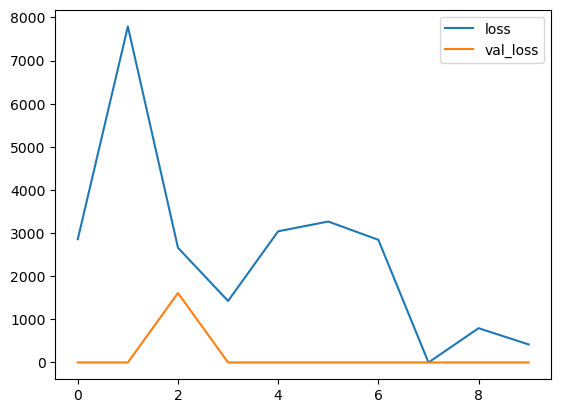

In [186]:
losses[['loss','val_loss']].plot()

# Prédiction sur une image

In [187]:
os.listdir(test_dir+'faux_billets')[2]

'IMG-20241227-WA002à.jpg'

In [188]:
para_cell

'C:\\Users\\LENAFANNY\\Desktop\\MIAGE 2 2024-2025\\SID 569 Data Mining\\Détection de faux billets\\Dataset_Billets\\Train\\/Bons_billets/.trashed-173816624-CamScanner 27-12-2024 14.13_14.jpg'

In [189]:
para_cell2 = test_dir+'/faux_billets'+'/IMG-20241227-WA002à.jpg'
para_cell2

'C:\\Users\\LENAFANNY\\Desktop\\MIAGE 2 2024-2025\\SID 569 Data Mining\\Détection de faux billets\\Dataset_Billets\\Test\\/faux_billets/IMG-20241227-WA002à.jpg'

In [205]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(para_cell2,target_size=image_shape)

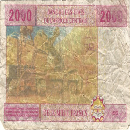

In [206]:
my_image

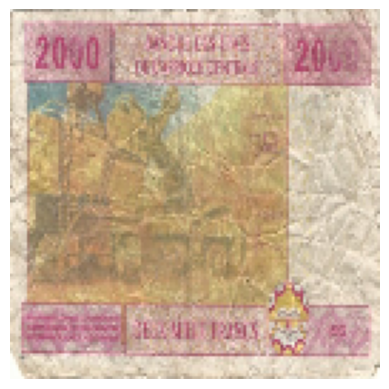

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Résultat de la prédiction: BON BILLET


In [211]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Charger le modèle MLP préalablement entraîné
model = load_model('C:\\Users\\LENAFANNY\\Desktop\\MIAGE 2 2024-2025\\SID 569 Data Mining\\Détection de faux billets\\Billets_detector.h5')

# Charger et afficher l'image à prédire
img = my_image

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()

# Prétraiter l'image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) #Ajouter une dimension pour créer un lot car le modèle s'attend à recevoir des lots d'images

img_array = img_array.astype('float32') / 255.0 

# Faire la prédiction
prediction = model.predict(img_array)

# Afficher le résultat
resultat = "FAUX BILLET" if prediction > 0.5 else "BON BILLET"
print("\nRésultat de la prédiction:", resultat)


# MODELE CNN 

fort est de constater que le MLP ne donne pas de bons resultats peut etre est ce du a notre dataset qui est desequilibree ?. la suite nous utiliserons le CNN qui est un modele concu pour reconnaitre les formes et les motifs d'images, ce qui est plus difficiles pour les MLP et prenne moin de parametres que le MLP ce qui les rends plus efficaces  

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import models
from keras import layers

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))

# Les couches Dropout aident à réduire l'overfitting en désactivant les neurones de façon aléatoire pendant l'entraînement.
# Ici nous demandons de désactiver aléatoirement 50% des neurones.
model2.add(Dropout(0.5))

# Dernière couche, n'oubliez pas c'est binaire, nous utilisons donc la sigmoïde
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 392, 739, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 196, 369, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 194, 367, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 97, 183, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 95, 181, 64)         │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 47, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 270720)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      34,652,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,708,737 (132.40 MB)

 Trainable params: 34,708,737 (132.40 MB)

 Non-trainable params: 0 (0.00 B)

# Entrainement du modèle CNN

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
batch_size = 16

In [47]:
image_gen.flow_from_directory(train_path)

Found 120 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 31 images belonging to 2 classes.


In [49]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 120 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 31 images belonging to 2 classes.


In [51]:
results = model2.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.6416 - loss: 3.4936 - val_accuracy: 0.9032 - val_loss: 0.2827
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.8753 - loss: 0.3701 - val_accuracy: 0.9032 - val_loss: 0.1915
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9223 - loss: 0.2343 - val_accuracy: 0.9032 - val_loss: 0.1387
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.9204 - loss: 0.1852 - val_accuracy: 0.9032 - val_loss: 0.2539
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - accuracy: 0.9554 - loss: 0.2352 - val_accuracy: 0.9032 - val_loss: 0.2017


In [52]:
from tensorflow.keras.models import load_model
model2.save('Faux_Billets_CNN.h5')

In [53]:
losses = pd.DataFrame(model2.history.history)

###  evaluation du model

<Axes: >

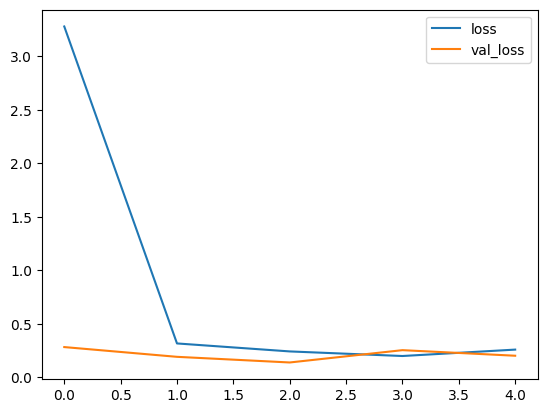

In [54]:
losses[['loss','val_loss']].plot()

ici nous notons que la perte d'entrainement est proportionnelle a  la perte dans le test donc pas de sur(sous)apprentissage

In [56]:
model2.evaluate(test_image_gen)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9355 - loss: 0.1701


[0.20173758268356323, 0.9032257795333862]

In [92]:
pred_probabilities = model2.predict(test_image_gen)
pred_probabilities

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


array([[0.09578802],
       [0.4328794 ],
       [0.06675255],
       [0.02642811],
       [0.05322688],
       [0.04801649],
       [0.08292925],
       [0.06282082],
       [0.07317179],
       [0.13675976],
       [0.06139813],
       [0.06403702],
       [0.06180032],
       [0.06519566],
       [0.0703072 ],
       [0.12311451],
       [0.12398822],
       [0.07085343],
       [0.20633633],
       [0.13698502],
       [0.01573381],
       [0.06970172],
       [0.03164981],
       [0.4476851 ],
       [0.03239284],
       [0.03139592],
       [0.09687239],
       [0.41083   ],
       [0.4473021 ],
       [0.40259853],
       [0.43240327]], dtype=float32)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,confusion_matrix
print(confusion_matrix(test_image_gen.classes,predictions))
print(classification_report(test_image_gen.classes,predictions))

[[28  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.00      0.00      0.00         3

    accuracy                           0.90        31
   macro avg       0.45      0.50      0.47        31
weighted avg       0.82      0.90      0.86        31



C:\Users\HIGH-TECH CORP'S\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIGH-TECH CORP'S\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIGH-TECH CORP'S\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

nous constatons ici que notre model est incapable de predire les faux billets ce qui ne nous supprend pas trop cas notre dataset est vraiment desequilibree

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


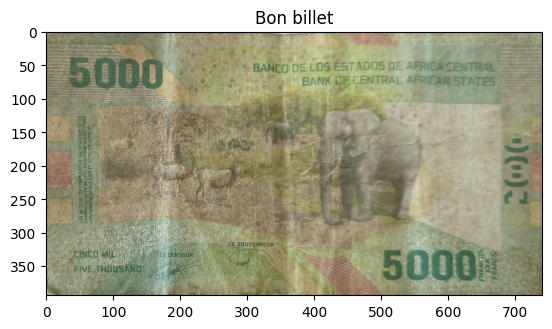

In [106]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Charger votre modèle MLP préalablement entraîné
model2 = load_model('Faux_Billets_CNN.h5')

# Charger et prétraiter l'image que vous voulez prédire
#img_path = 'chemin_vers_votre_image.jpg'
img = image.load_img(para_cell, target_size=image_shape) # Ajuster la taille en fonction de votre modèle
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour créer un lot

# Normalisation des valeurs de pixel de l'image
img_array = img_array.astype('float32') / 255.0

# Faire la prédiction
prediction = model2.predict(img_array)
plt.imshow(img)
# Afficher la prédiction
if prediction > 0.5:
    print(img.class_indices)
    plt.title('faux billet')
else:
    plt.title("Bon billet")

# TRANSFERT LEARNING

le transfert learning est une technique en apprentissage automatique et en intelligence artificielle qui consiste a utiliser des connaissances acquises lors de l'apprentissage d'une tache pour ameliorer l'apprentissage d'une aute tache.Dans ce notre cas nous allons utiliser le model VGG16 qui est un model deja entraine sur la classification d'image

In [169]:
#redimmensionnement d'images 
datagen2 = ImageDataGenerator(
    rescale=1./255
)

train_generetor2 = datagen2.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generetor2 = datagen2.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 120 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


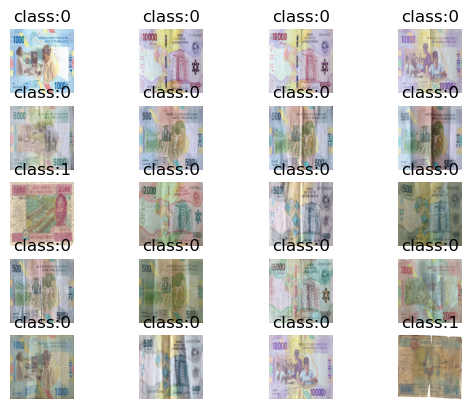

In [170]:
#affichage des billets redimensionne avec leur target
images , labels = next(train_generetor2)


for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"class:{np.argmax(labels[i])}")
    plt.axis('off')

plt.show()

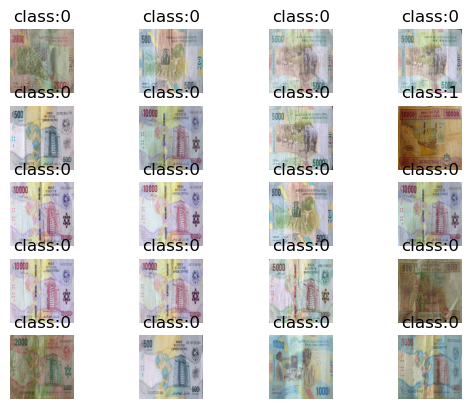

In [171]:
images , labels = next(test_generetor2)


for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"class:{np.argmax(labels[i])}")
    plt.axis('off')

plt.show()

In [172]:
#importation du model deja entraine
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Flatten
from keras.models import Model
from sklearn.metrics import classification_report,confusion_metric
img_shape=(224,224,3)
base_model = VGG16(input_shape=img_shape,include_top=False,weights='imagenet')
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

on constate que la derniere chouche (outpout) possede 7 couches ce qui n'est pas approprie pour notre travail car on veut classifier les billets en deux categories donc il nous faux deux couches en sortie

In [ ]:
#bloquer les parametres de base
base_model.trainable = False

In [ ]:
base_model.output

In [ ]:
#ajouter les couches de sortie
x =Flatten()(base_model.output)
prediction = Dense(2,activation='sigmoid')(x)

In [ ]:
#creation du model global
model =Model(inputs=base_model.input,outputs=prediction)
model.summary()

In [ ]:
#compilation du model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#appliquer le modele
model.fit(train_generetor,epochs=5,validation_data=test_generetor ) 

In [ ]:
#visualisation de l'evolution d'entrainement du model
import pandas as pd
loss = pd.DataFrame(model.history.history)

In [ ]:
loss[['loss','val_loss']].plot()

In [ ]:
#accuracy et perte
valid_loss, valid_accuracy = model.evaluate(test_generetor)
print(f"loss:{valid_loss} \naccuracy:{valid_accuracy}")

In [ ]:
#prediction sur les donnees de test
predict = model.predict(test_generetor)

In [ ]:
predicted_classes = np.argmax(predict, axis=1)
print(confusion_matrix(test_generator.classes,predict))
print(classification_report(test_generator.classes,predict))